# US Car Accidents

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

For the meaning of each column refer to https://www.kaggle.com/sobhanmoosavi/us-accidents

Papers using this dataset:

    arXiv:1906.05409
    arXiv:1909.09638


In [2]:
df = pd.read_csv("US_Accidents_Dec19.csv")

In [3]:
df.shape

(2974335, 49)

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


## Remove NaNs

In [5]:
for name in df.columns:
    print(name + ": " + str(df[name].isna().sum()))

ID: 0
Source: 0
TMC: 728071
Severity: 0
Start_Time: 0
End_Time: 0
Start_Lat: 0
Start_Lng: 0
End_Lat: 2246264
End_Lng: 2246264
Distance(mi): 0
Description: 1
Number: 1917605
Street: 0
Side: 0
City: 83
County: 0
State: 0
Zipcode: 880
Country: 0
Timezone: 3163
Airport_Code: 5691
Weather_Timestamp: 36705
Temperature(F): 56063
Wind_Chill(F): 1852623
Humidity(%): 59173
Pressure(in): 48142
Visibility(mi): 65691
Wind_Direction: 45101
Wind_Speed(mph): 440840
Precipitation(in): 1998358
Weather_Condition: 65932
Amenity: 0
Bump: 0
Crossing: 0
Give_Way: 0
Junction: 0
No_Exit: 0
Railway: 0
Roundabout: 0
Station: 0
Stop: 0
Traffic_Calming: 0
Traffic_Signal: 0
Turning_Loop: 0
Sunrise_Sunset: 93
Civil_Twilight: 93
Nautical_Twilight: 93
Astronomical_Twilight: 93


In [6]:
# removing End_Lat, End_Lng, Number, Wind Chill, Precipitation 
df = df.drop(["End_Lat", "End_Lng", "Number", "Wind_Chill(F)", "Precipitation(in)"], axis=1)

In [7]:
# check if ID is unique
df["ID"].nunique() == df.shape[0]

True

In [8]:
# convert object type into datetime64 type
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

In [9]:
# it is useless, data is only from US
df["Country"].nunique()

1

In [10]:
# it is useless, always False
df["Turning_Loop"].nunique()

1

In [11]:
df = df.drop(["Country", "Turning_Loop"], axis=1)

Keep only the 40 most common weather conditions and replace all the others with "Other"

In [12]:
replacement_list = df["Weather_Condition"].value_counts()[40:].index
replacement_dict ={i: "Other" for i in replacement_list}

In [13]:
df.replace({'Weather_Condition': replacement_dict}, inplace=True)

In [14]:
df.dtypes

ID                               object
Source                           object
TMC                             float64
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64


# Partial EDA

## Source

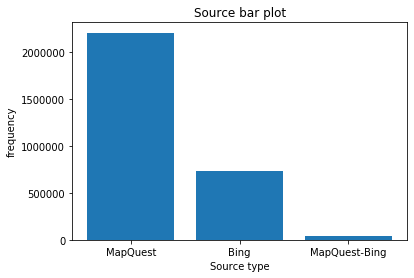

In [15]:
source_vc = df["Source"].value_counts()

plt.bar(source_vc.index, source_vc.values)
plt.title("Source bar plot")
plt.xlabel("Source type")
plt.ylabel("frequency")
plt.show()

## Time

### Generic

In [14]:
start_time = df["Start_Time"].apply(lambda x: x.time())
start_hour = start_time.apply(lambda x:x.hour)

In [15]:
end_time = df["End_Time"].apply(lambda x: x.time())
end_hour = end_time.apply(lambda x:x.hour)

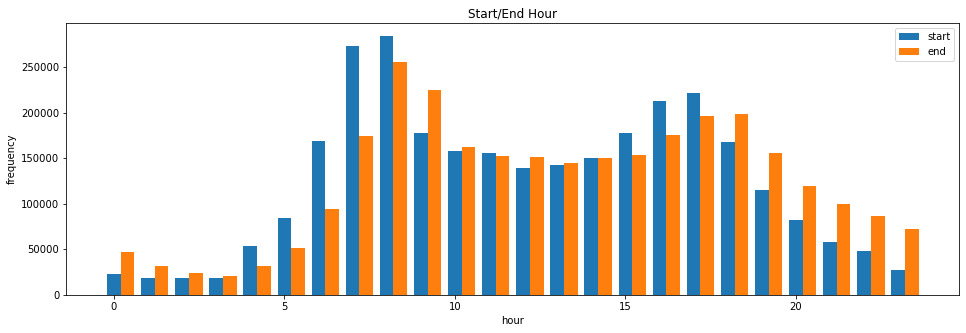

In [16]:
sh_vc = start_hour.value_counts().sort_index()
eh_vc = end_hour.value_counts().sort_index()

plt.figure(figsize=(16,5))
plt.bar(sh_vc.index, sh_vc.values, width=0.4, label="start")
plt.bar(eh_vc.index+0.4, eh_vc.values, width=0.4, label="end")
plt.title("Start/End Hour")
plt.xlabel("hour")
plt.ylabel("frequency")
plt.legend()
plt.show()

### Weekend

In [120]:
start_time_wd = df["Start_Time"].apply(lambda x: x.weekday())
start_time_weekend = start_time[(start_time_wd == 5) | (start_time_wd == 6)]
start_hour_weekend = start_time_weekend.apply(lambda x:x.hour)

In [131]:
end_time_wd = df["End_Time"].apply(lambda x: x.weekday())
end_time_weekend = end_time[(end_time_wd == 5) | (end_time_wd == 6)]
end_hour_weekend = end_time_weekend.apply(lambda x:x.hour)

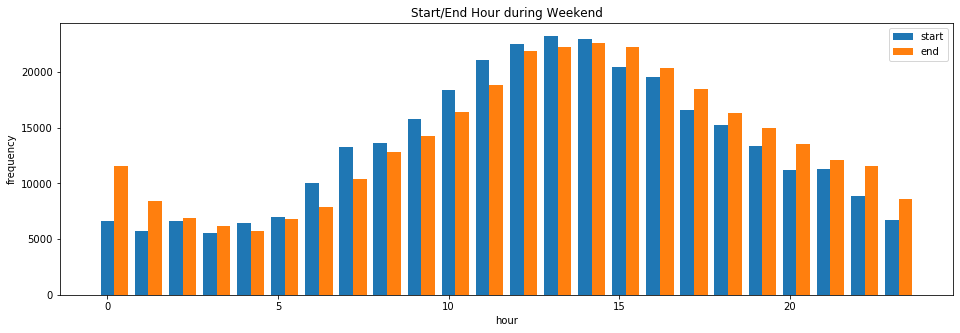

In [133]:
sh_wk = start_hour_weekend.value_counts().sort_index()
eh_wk = end_hour_weekend.value_counts().sort_index()


plt.figure(figsize=(16,5))
plt.bar(sh_wk.index, sh_wk.values, width=0.4, label="start")
plt.bar(eh_wk.index+0.4, eh_wk.values, width=0.4, label="end")
plt.title("Start/End Hour during Weekend")
plt.xlabel("hour")
plt.ylabel("frequency")
plt.legend()
plt.show()

### Working days

In [134]:
start_time_work = start_time[(start_time_wd != 5) & (start_time_wd != 6)]
start_hour_work = start_time_work.apply(lambda x:x.hour)

In [135]:
end_time_work = end_time[(end_time_wd != 5) & (end_time_wd != 6)]
end_hour_work = end_time_work.apply(lambda x:x.hour)

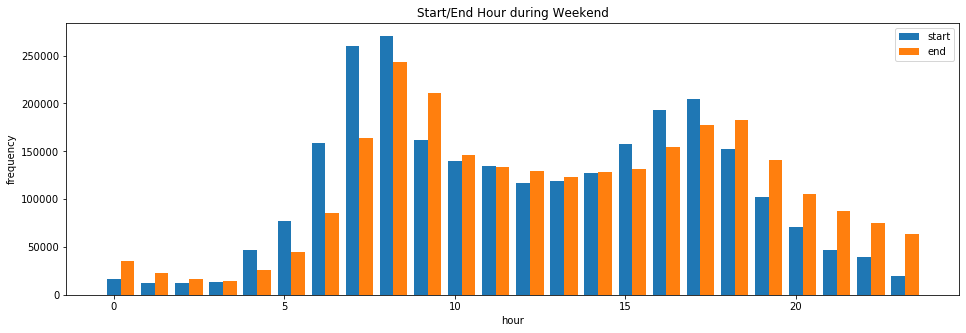

In [136]:
sh_wk = start_hour_work.value_counts().sort_index()
eh_wk = end_hour_work.value_counts().sort_index()


plt.figure(figsize=(16,5))
plt.bar(sh_wk.index, sh_wk.values, width=0.4, label="start")
plt.bar(eh_wk.index+0.4, eh_wk.values, width=0.4, label="end")
plt.title("Start/End Hour during Weekend")
plt.xlabel("hour")
plt.ylabel("frequency")
plt.legend()
plt.show()

## TMC

There are 728071 NaN in the TMP column.


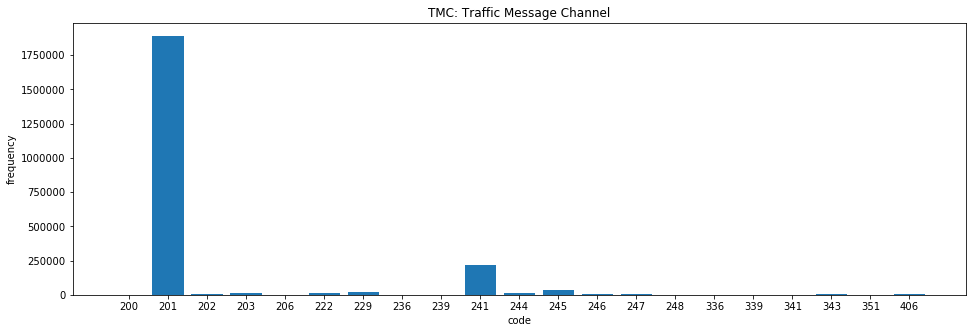

In [17]:
print("There are {} NaN in the TMP column.".format(df["TMC"].isna().sum()))

TMC_vc = df["TMC"].value_counts().sort_index()
plt.figure(figsize=(16,5))
plt.bar(TMC_vc.index.map(lambda x: str(int(x))), TMC_vc.values)
plt.title("TMC: Traffic Message Channel")
plt.xlabel("code")
plt.ylabel("frequency")
plt.show()

## Severity

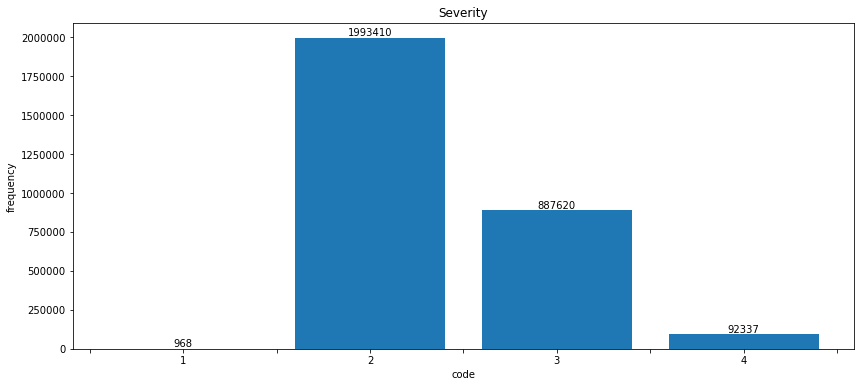

In [18]:
sev_vc = df["Severity"].value_counts(dropna=False).sort_index()

plt.figure(figsize=(14,6))
plt.bar(sev_vc.index, sev_vc.values)
plt.title("Severity")
plt.xlabel("code")
plt.ylabel("frequency")
plt.gca().set_xticklabels([None,None,1,None, 2, None, 3, None, 4])


for i, v in enumerate(sev_vc.values):
    plt.text(i+1, v+15000, str(v), color='black', fontweight=None, ha="center")

plt.show()

## Distance

In [19]:
# too many distances are equal to zero
print("null distances : ",(df["Distance(mi)"]==0).sum())
print("distances <=0.1: ", (df["Distance(mi)"]<=0.1).sum())

null distances :  1996120
distances <=0.1:  2357571


In [20]:
dist_nonnull = df["Distance(mi)"][df["Distance(mi)"] != 0]

In [21]:
p_95 = np.percentile(dist_nonnull,95)
print("95th percentile: ", p_95)

95th percentile:  3.41000008583


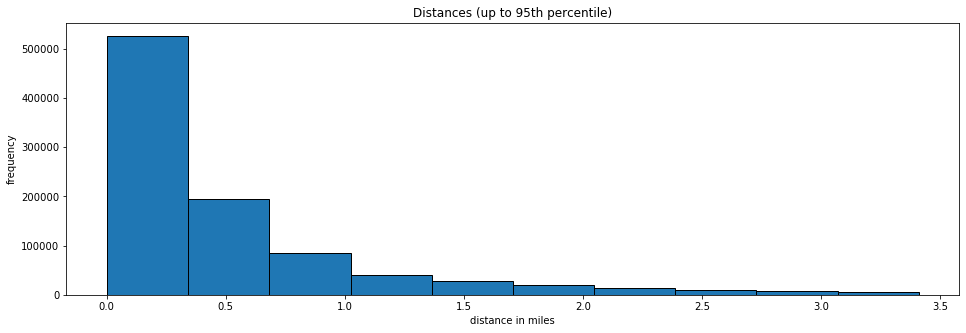

In [22]:
plt.figure(figsize=(16,5))
plt.hist(dist_nonnull[dist_nonnull <= p_95], edgecolor="k")
plt.title("Distances (up to 95th percentile)")
plt.xlabel("distance in miles")
plt.ylabel("frequency")
plt.show()

## Categorical Variables

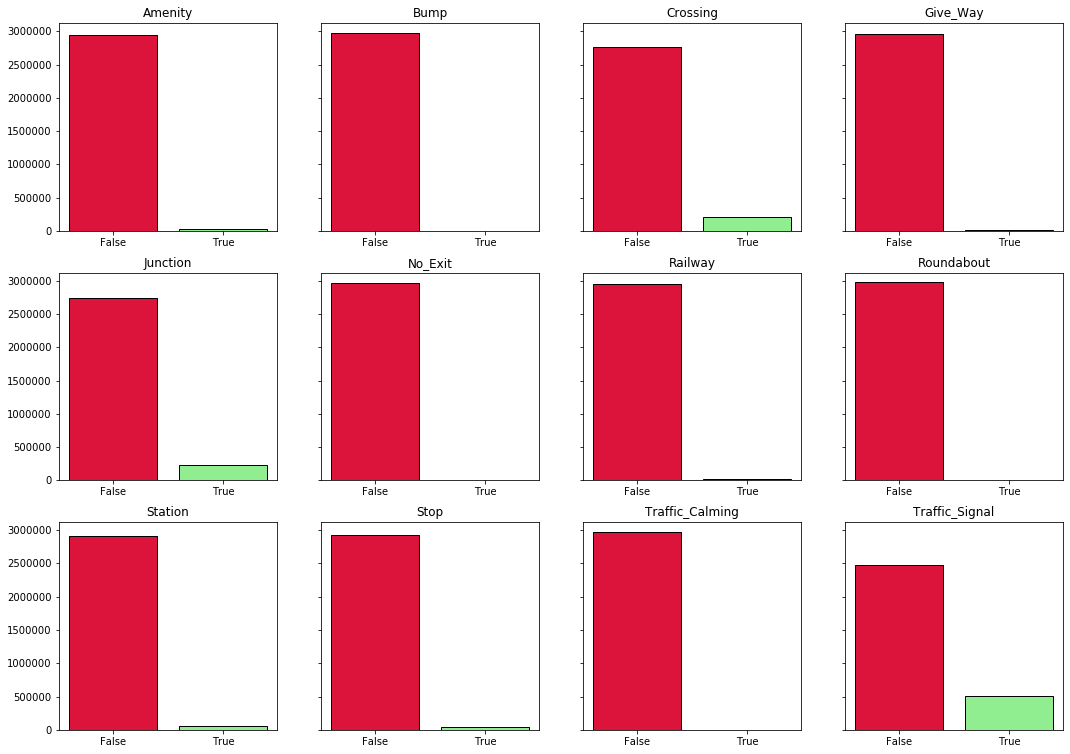

In [23]:
fig, ax = plt.subplots(3,4, figsize=(18,13), sharey=True)

ind1 = 0
ind2 = 0
for name in df.columns:
    if df[name].dtype == "bool":
        vc = df[name].value_counts()
        ax[ind2, ind1].set_title(name)
        ax[ind2, ind1].bar(vc.index.map(lambda x: str(x)), vc.values, 
                           color=["crimson", "lightgreen"], edgecolor="k")
        ind1 += 1
        if ind1 == 4:
            ind1 = 0
            ind2 += 1
plt.show()

# Description

In [16]:
len_descr = df["Description"].apply(lambda x: len(str(x).split(" ")))

In [17]:
print("Normalized contingency table of Severity and Description Length")

sev_len_df = pd.crosstab(df["Severity"], pd.qcut(len_descr, 10, duplicates="drop"), 
            margins=True, normalize="columns")

sev_len_df.style.background_gradient(cmap='coolwarm').set_precision(3)

Normalized contingency table of Severity and Description Length


Description,"(0.999, 6.0]","(6.0, 7.0]","(7.0, 8.0]","(8.0, 9.0]","(9.0, 10.0]","(10.0, 12.0]","(12.0, 14.0]","(14.0, 16.0]","(16.0, 75.0]",All
Severity,,,,,,,,,,
1,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000
2,0.846,0.925,0.883,0.730,0.587,0.548,0.422,0.369,0.302,0.670
3,0.152,0.073,0.116,0.246,0.314,0.363,0.522,0.594,0.670,0.298
4,0.003,0.001,0.001,0.023,0.098,0.089,0.056,0.037,0.028,0.031


In [18]:
print("Normalized contingency table of Distance (in miles) and Description Length")

dist_len_df = pd.crosstab(pd.qcut(df["Distance(mi)"], 50, duplicates="drop"), 
                         pd.qcut(len_descr, 10, duplicates="drop"), 
                         margins=True, normalize="columns")

dist_len_df.style.background_gradient(cmap='viridis').set_precision(3)

Normalized contingency table of Distance (in miles) and Description Length


Description,"(0.999, 6.0]","(6.0, 7.0]","(7.0, 8.0]","(8.0, 9.0]","(9.0, 10.0]","(10.0, 12.0]","(12.0, 14.0]","(14.0, 16.0]","(16.0, 75.0]",All
Distance(mi),,,,,,,,,,
"(-1e-08, 0.0099999998]",0.418,0.807,0.787,0.727,0.649,0.671,0.723,0.732,0.617,0.682
"(0.0099999998, 0.01]",0.017,0.068,0.076,0.096,0.090,0.096,0.110,0.137,0.127,0.084
"(0.01, 0.05]",0.054,0.012,0.011,0.009,0.010,0.007,0.002,0.001,0.001,0.014
"(0.05, 0.132]",0.071,0.013,0.012,0.014,0.019,0.015,0.006,0.003,0.003,0.020
"(0.132, 0.217]",0.064,0.014,0.013,0.016,0.021,0.019,0.008,0.004,0.003,0.020
"(0.217, 0.305]",0.060,0.013,0.013,0.017,0.022,0.019,0.009,0.005,0.005,0.020
"(0.305, 0.398]",0.060,0.013,0.012,0.019,0.022,0.018,0.009,0.005,0.006,0.020
"(0.398, 0.489]",0.061,0.013,0.014,0.018,0.021,0.016,0.009,0.005,0.006,0.020
"(0.489, 0.592]",0.060,0.013,0.013,0.017,0.021,0.017,0.010,0.007,0.008,0.020


# Correlations

Article on TowardsDataScience about categorical correlation:
    https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

Article on medium on the same topic:
    https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

## Continuos variables

In [19]:
numeric_columns = []
for name in df.columns:
    if (df[name].dtype == "float64"):
        numeric_columns.append(name)

In [20]:
corr = df[numeric_columns].corr()

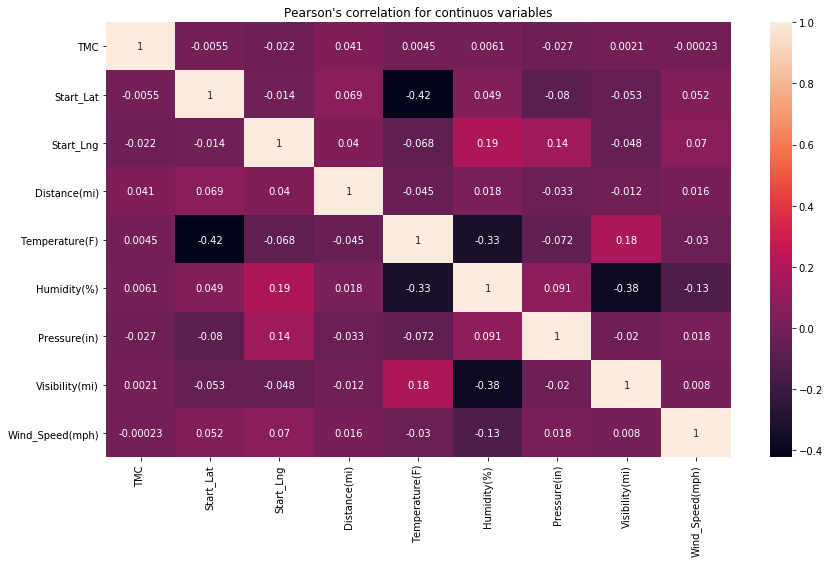

In [21]:
plt.figure(figsize=(14,8))
plt.title("Pearson's correlation for continuos variables")
sns.heatmap(corr, annot=True)
plt.show()

In [22]:
corr.style.background_gradient(cmap='coolwarm')\
    .set_properties(**{'max-width': '70px', 'font-size': '12pt'})\
    .set_precision(2)

,TMC,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
TMC,1.00,-0.01,-0.02,0.04,0.00,0.01,-0.03,0.00,-0.00
Start_Lat,-0.01,1.00,-0.01,0.07,-0.42,0.05,-0.08,-0.05,0.05
Start_Lng,-0.02,-0.01,1.00,0.04,-0.07,0.19,0.14,-0.05,0.07
Distance(mi),0.04,0.07,0.04,1.00,-0.04,0.02,-0.03,-0.01,0.02
Temperature(F),0.00,-0.42,-0.07,-0.04,1.00,-0.33,-0.07,0.18,-0.03
Humidity(%),0.01,0.05,0.19,0.02,-0.33,1.00,0.09,-0.38,-0.13
Pressure(in),-0.03,-0.08,0.14,-0.03,-0.07,0.09,1.00,-0.02,0.02
Visibility(mi),0.00,-0.05,-0.05,-0.01,0.18,-0.38,-0.02,1.00,0.01
Wind_Speed(mph),-0.00,0.05,0.07,0.02,-0.03,-0.13,0.02,0.01,1.00


## Categorical Variables

In [23]:
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

def chi2_test(crosstab, prob=0.95, details=True):

    # chi-squared test with similar proportions
    from scipy.stats import chi2_contingency
    from scipy.stats import chi2

    # contingency table
    table = crosstab
    stat, p, dof, expected = chi2_contingency(table)
    critical = chi2.ppf(prob, dof)
    
    if details == True:
        print('degrees of freedom = {}'.format(dof))
        print('stat = {}'.format(stat))
        print('p-value = {}'.format(p))

        print('prob = {}'.format(prob))
        print('critical value = {}'.format(critical))

    if abs(stat) >= critical:
        print('Dependent')
        
        res = 1
        
        return res
    
    else:
        print('Independent') 
        
        res = 0
      
        return res

In [24]:
cat = []
for col in df.columns:
    if df[col].dtype == "bool":
        cat.append(col)

In [25]:
matrix = []
for col_1 in cat:
    for col_2 in cat:
        print(col_1,"---", col_2)
        matrix.append(chi2_test(pd.crosstab(df[col_1], df[col_2]), details=False))
        print("\n")

Amenity --- Amenity
Dependent


Amenity --- Bump
Dependent


Amenity --- Crossing
Dependent


Amenity --- Give_Way
Dependent


Amenity --- Junction
Dependent


Amenity --- No_Exit
Dependent


Amenity --- Railway
Dependent


Amenity --- Roundabout
Independent


Amenity --- Station
Dependent


Amenity --- Stop
Dependent


Amenity --- Traffic_Calming
Dependent


Amenity --- Traffic_Signal
Dependent


Bump --- Amenity
Dependent


Bump --- Bump
Dependent


Bump --- Crossing
Dependent


Bump --- Give_Way
Independent


Bump --- Junction
Dependent


Bump --- No_Exit
Dependent


Bump --- Railway
Independent


Bump --- Roundabout
Dependent


Bump --- Station
Dependent


Bump --- Stop
Dependent


Bump --- Traffic_Calming
Dependent


Bump --- Traffic_Signal
Dependent


Crossing --- Amenity
Dependent


Crossing --- Bump
Dependent


Crossing --- Crossing
Dependent


Crossing --- Give_Way
Dependent


Crossing --- Junction
Dependent


Crossing --- No_Exit
Dependent


Crossing --- Railway
Dependent


C

1 means DEPENDENT, 0 means INDEPENDENT


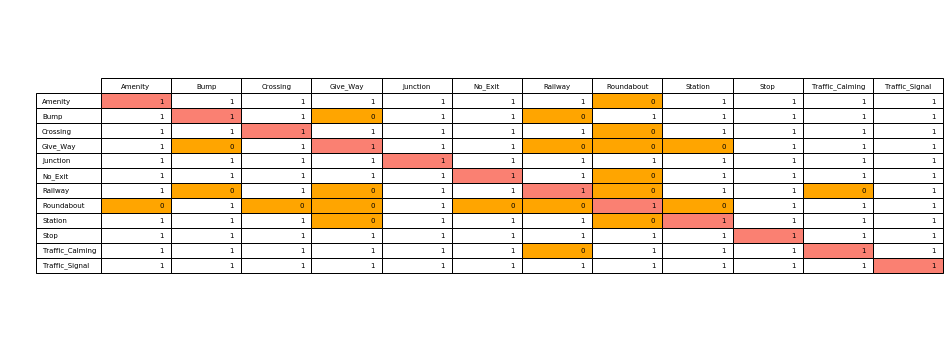

In [26]:
data = np.array(matrix).reshape(12,12)
fig, ax = plt.subplots(figsize=(12,5))

# create color matrix to highlight table entries
D = np.empty((12,12), dtype=object)
for i in range(12):
    for j in range(12):
        if data[i,j] == 1:
            if i == j:
                D[i,j] = "salmon"
            else:
                D[i,j] = "white"
        else:
            D[i,j] = "orange"

print("1 means DEPENDENT, 0 means INDEPENDENT")
            
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=data, colLabels=cat, rowLabels=cat, loc='center', cellColours=D)

fig.tight_layout()

plt.show()

In [27]:
cat_mod = []
for col in df.columns:
    if col != "ID" and col != "Description":
        if (df[col].dtype == "bool") or (df[col].dtype == "int64"):
            cat_mod.append(col)

cat_mod.append("Wind_Direction")
cat_mod.append("Weather_Condition")
cat_mod.append("Sunrise_Sunset")

In [28]:
# https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
# https://en.wikipedia.org/wiki/Correlation_ratio

import scipy, math

#all taken from dython library, with slight modifications

def cramers_v_MOD(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def theils_u_MOD(x,y):
    s_xy = conditional_entropy_MOD(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = scipy.stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def conditional_entropy_MOD(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def correlation_ratio_MOD(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
matrix2 = []
for col_1 in cat_mod:
    for col_2 in cat_mod:
        matrix2.append(cramers_v_MOD(df[col_1], df[col_2]))

In [ ]:
matrix3 = []
for col_1 in cat_mod:
    for col_2 in cat_mod:
        matrix3.append(theils_u_MOD(df[col_1], df[col_2]))

In [71]:
CramV_df = pd.DataFrame(np.array(matrix2).reshape(13,13), 
                        columns=cat_mod, index=cat_mod).apply(lambda x: round(x,3))

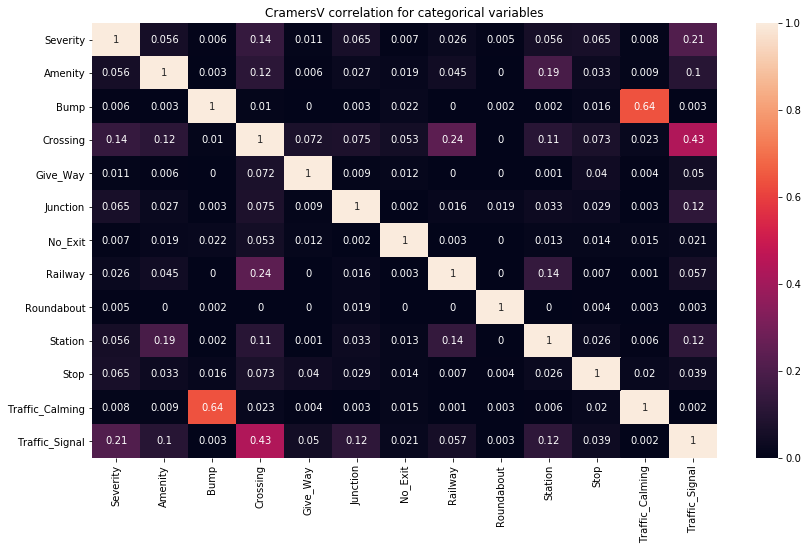

In [77]:
plt.figure(figsize=(14,8))
plt.title("CramersV correlation for categorical variables")
sns.heatmap(CramV_df, annot=True)
plt.show()

In [93]:
TheilsU_df = pd.DataFrame(np.array(matrix3).reshape(13,13), 
             columns=cat_mod, index=cat_mod).apply(lambda x: round(x,3))

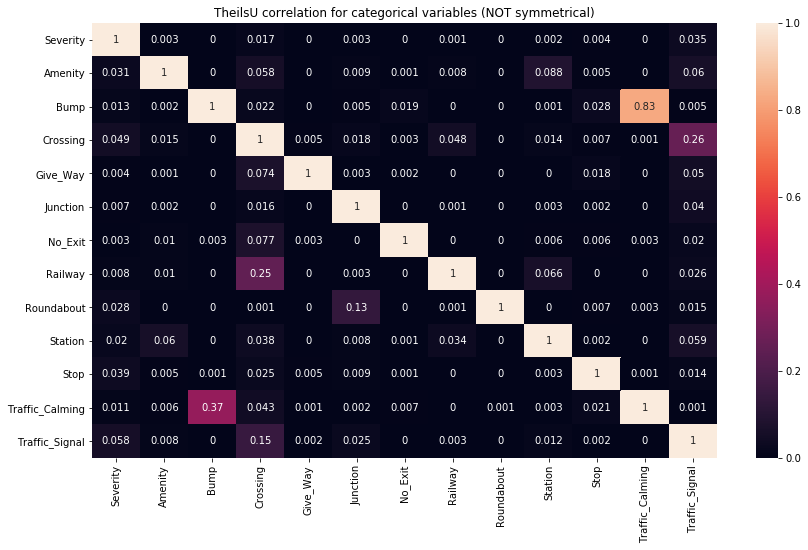

In [94]:
plt.figure(figsize=(14,8))
plt.title("TheilsU correlation for categorical variables (NOT symmetrical)")
sns.heatmap(TheilsU_df, annot=True)
plt.show()

## Categorical against Continuos

In [120]:
continuos_features = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)',
                      'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

In [101]:
from dython.nominal import correlation_ratio

In [ ]:
matrix4 = []
for col_1 in cat_mod:
    for col_2 in continuos_features:
        matrix4.append(correlation_ratio(df[col_1], df[col_2]))     

In [130]:
Corr_Ratio_df = pd.DataFrame(np.array(matrix4).reshape(16,6), 
                 columns=continuos_features, index=cat_mod).apply(lambda x: round(x,3))

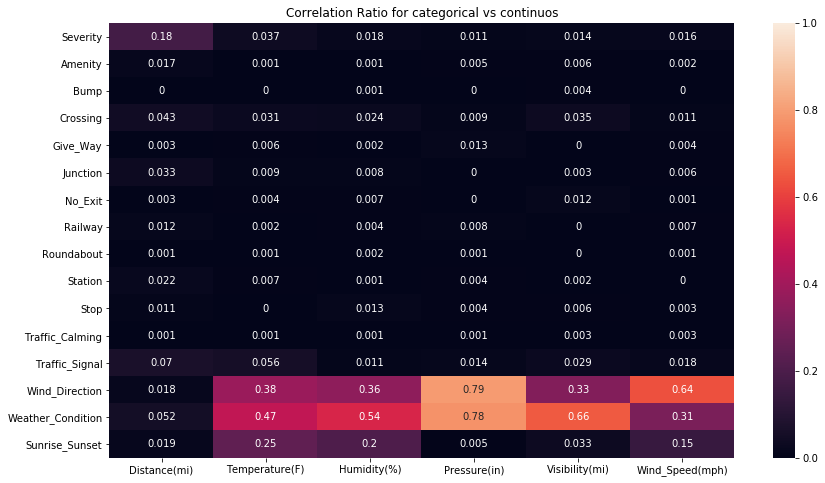

In [134]:
plt.figure(figsize=(14,8))
plt.title("Correlation Ratio for categorical vs continuos")
sns.heatmap(Corr_Ratio_df, annot=True, vmax=1)
plt.show()